# **08 Image Processing II**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform, filters, data

# Histogram Peocessing

## **<span style='color:#EA7500	'> Histogram of a Graylevel Image</span>**

(<Axes: >, <Axes: xlabel='intensity', ylabel='# pixels'>)

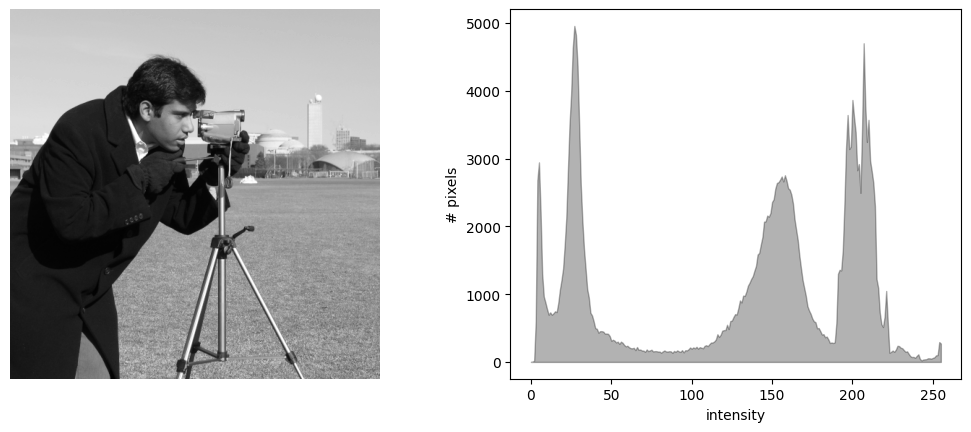

In [3]:
import skdemo
camera = data.camera()
skdemo.imshow_with_histogram(camera)

## **<span style='color:#EA7500	'>Histogram of a Color Image</span>**

(<Axes: >, <Axes: xlabel='intensity', ylabel='# pixels'>)

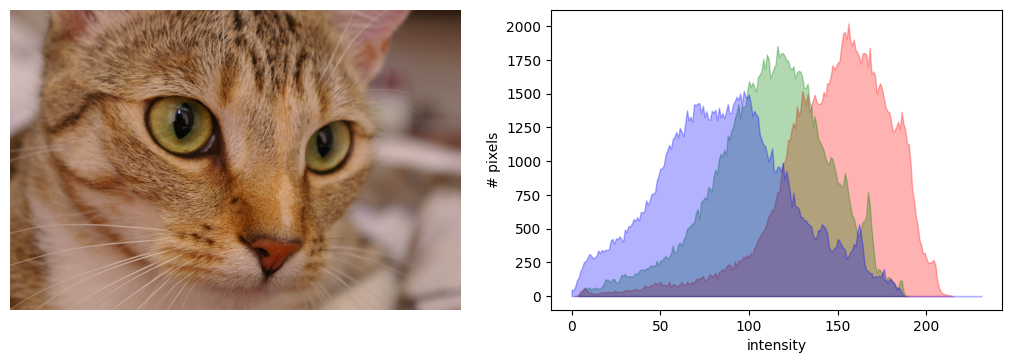

In [4]:
cat = data.chelsea()
skdemo.imshow_with_histogram(cat)

## **<span style='color:#EA7500	'>Contrast Adjustment</span>**

(<Axes: >, <Axes: xlabel='intensity', ylabel='# pixels'>)

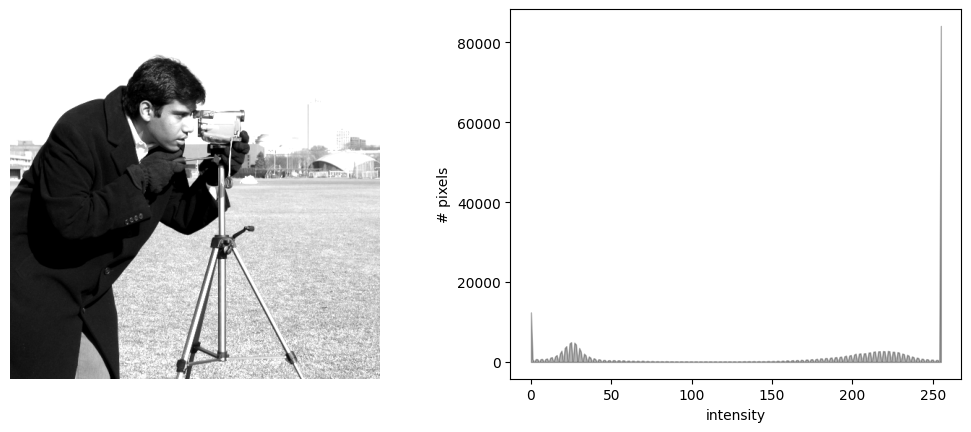

In [9]:
from skimage import exposure
high_contrast = exposure.rescale_intensity(camera, in_range=(10, 180))
skdemo.imshow_with_histogram(high_contrast)
#10以下為0 , 180以上255然後拉開


## **<span style='color:#EA7500	'>Histogram Equalization</span>**

(<Axes: >, <Axes: xlabel='intensity', ylabel='# pixels'>)

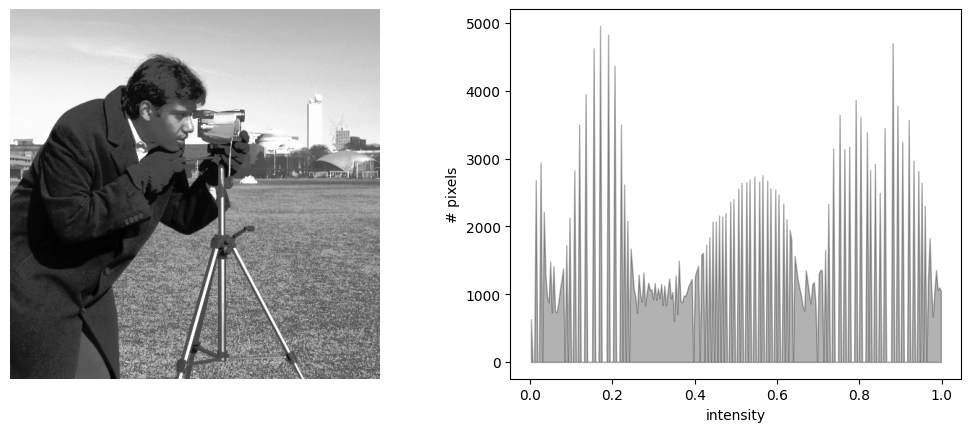

In [10]:
#graylevel 等比例上升
equalized = exposure.equalize_hist(camera)
skdemo.imshow_with_histogram(equalized)

# 512 pixel 256 grayscale


## **<span style='color:#EA7500	'>Adaptive Histogram Equalization</span>**

(<Axes: >, <Axes: xlabel='intensity', ylabel='# pixels'>)

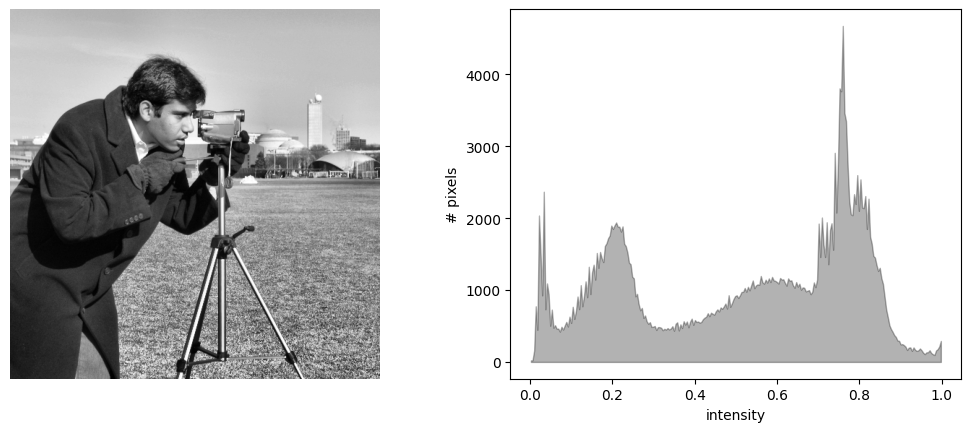

In [11]:
adaptive_equalized = exposure.equalize_adapthist(camera)
skdemo.imshow_with_histogram(adaptive_equalized)

# Image Segmentation

## **<span style='color:#EA7500	'>Image Thresholding</span>**

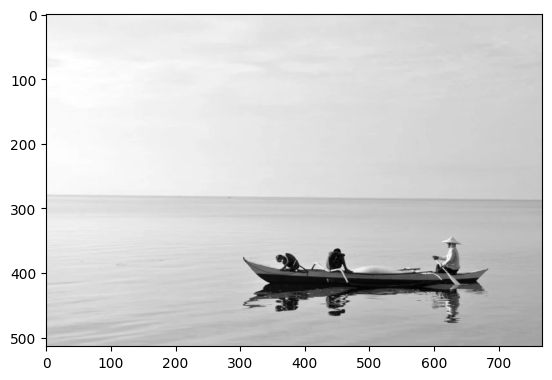

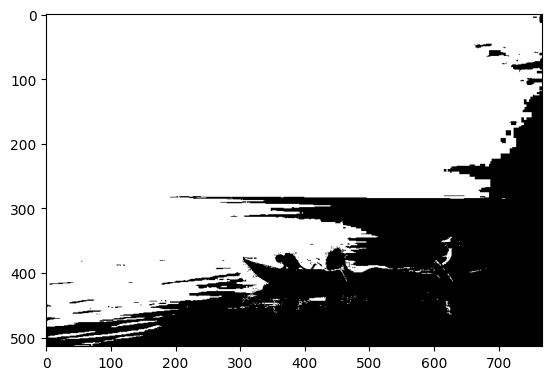

In [18]:
boat = io.imread('boat.png', as_gray=True)
plt.imshow(boat, cmap="gray")
plt.show()

boat_mask = boat > 0.8
#>0.8 return TRUE
plt.imshow(boat_mask, cmap="gray")
plt.show()


## **<span style='color:#EA7500	'>Otsu's Method</span>**

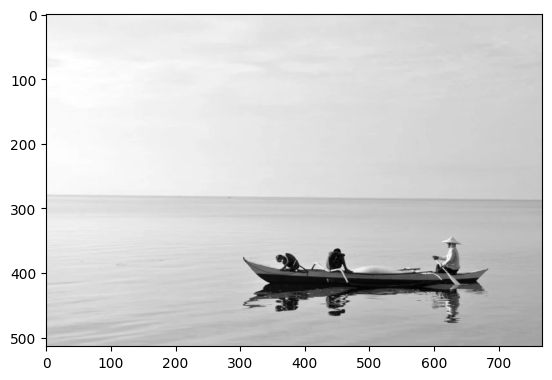

0.517578125


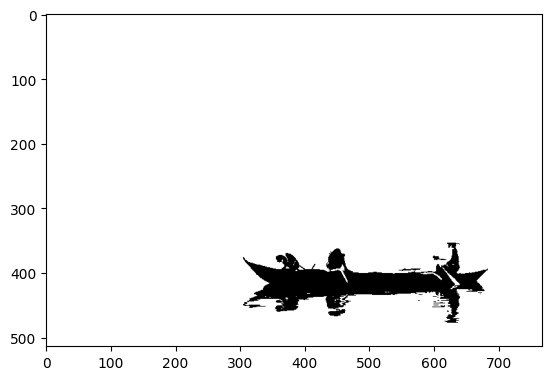

0.517578125


In [19]:
boat = io.imread('boat.png', as_gray=True)
plt.imshow(boat, cmap="gray")
plt.show()

otsu_thresh = filters.threshold_otsu(boat)
otsu_binary = boat > otsu_thresh
print(otsu_thresh)
plt.imshow(otsu_binary, cmap='gray')
plt.show()

print(otsu_thresh)

In [ ]:
    monkey_island = io.imread('monkey_island.jpg')
    fade_monkey_island = fade_gradually(monkey_island)
    f ,(ax0,ax1) = plt.subplots(1 , 2 , figsize = (20,10))
    ax0.imshow(monkey_island)
    ax0.axis('off')
    ax1.imshow(fade_monkey_island)
    ax1.

## **<span style='color:#EDA0A9	'>Exercise 1 (5 mins)</span>**
Try different threshold values to see if Otsu's method really finds the best threshold to your image


131


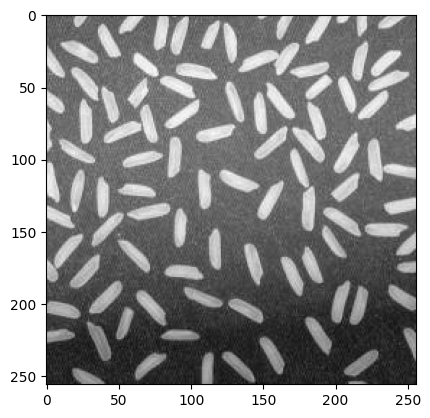

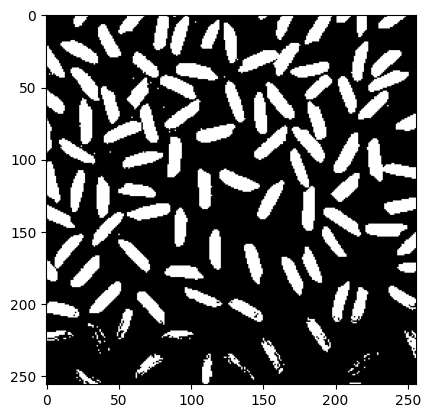

126


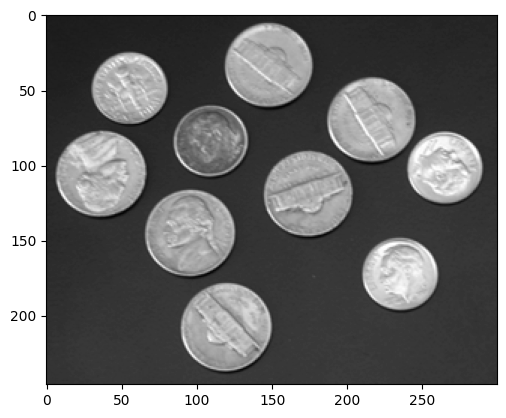

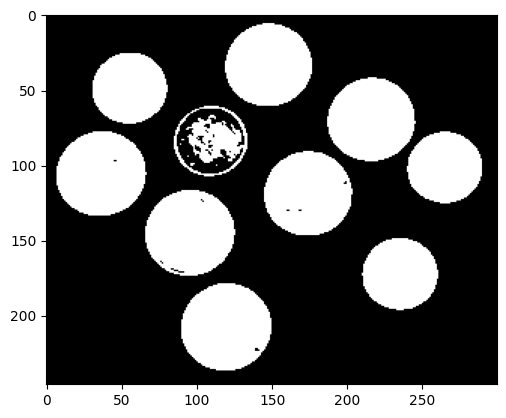

In [36]:
rice = io.imread('rice.jpg')
plt.imshow(rice, cmap="gray")
rice_thresh = filters.threshold_otsu(rice)
print(rice_thresh)
rice_binary = rice > otsu_thresh

plt.imshow(rice , cmap='gray')
plt.show()

plt.imshow(rice_binary, cmap='gray')
plt.show()

# TO DO

coin = io.imread('coins.png')
coin_thresh = filters.threshold_otsu(coin)
print(coin_thresh)
coin_binary = coin>coin_thresh
plt.imshow(coin , cmap='gray')
plt.show()
plt.imshow(coin_binary, cmap="gray")
plt.show()

# TO DO


## **<span style='color:#EA7500	'>Local Thresholding</span>**

15
[[119.54967784 118.97791211 118.04650844 ... 121.4759053  118.98919306
  117.87261551]
 [119.1690557  118.65044393 117.80438291 ... 120.91403078 118.71639255
  117.73376194]
 [118.57497684 118.15062878 117.45586202 ... 120.00588778 118.28888605
  117.52966615]
 ...
 [ 71.61904663  71.51674529  71.38529185 ...  74.11909673  73.80318751
   73.52314727]
 [ 71.4754893   71.30732687  71.08097055 ...  73.84876528  73.37218716
   72.98964551]
 [ 71.44045216  71.23295701  70.95073596 ...  73.6097858   73.04028074
   72.59984295]]
(256, 256)


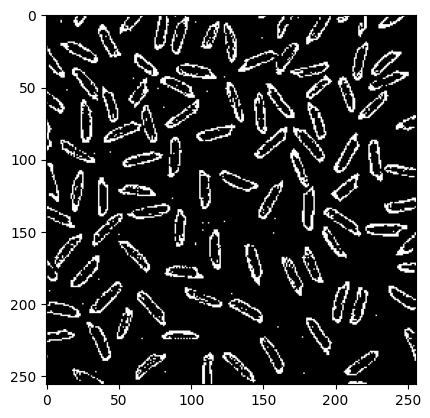

In [54]:
rice = io.imread('rice.jpg')
block_size = 15
print(block_size)
local_thresh = filters.threshold_local(rice, block_size, offset=-20)
print(local_thresh)
print(local_thresh.shape)
local_binary = rice > local_thresh
plt.imshow(local_binary, cmap='gray')
plt.show()


## **<span style='color:#EA7500	'>Background Estimation</span>**

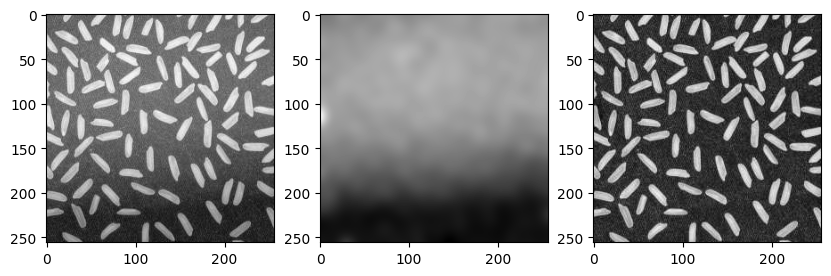

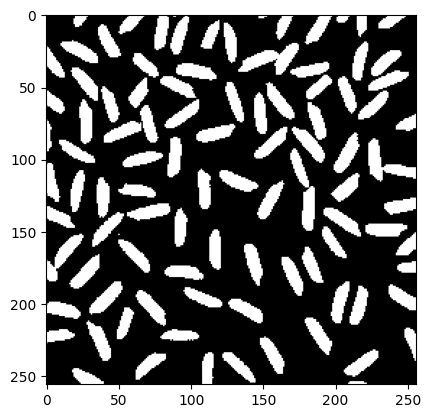

In [39]:
from skimage import morphology, img_as_float
img = img_as_float(rice)
bg = morphology.erosion(img, morphology.square(9))
bg = filters.gaussian(bg, sigma=7)
result = img - bg

plt.figure(figsize=(10,10))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap="gray")
plt.subplot(1, 3, 2)
plt.imshow(bg, cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(result, cmap="gray")
plt.show()

front = result > 0.2
plt.imshow(front, cmap="gray")
plt.show()

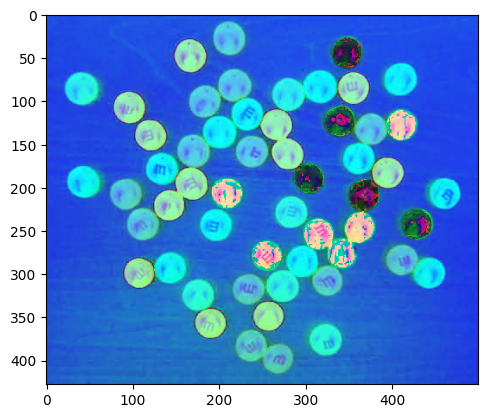

In [56]:
import numpy as np
from skimage.color import rgb2hsv
balloon = io.imread("mm.jpg")
width = balloon.shape[1]
height = balloon.shape[0]
img = np.zeros((height,width))
balloon_hsv = rgb2hsv(balloon)
plt.imshow(balloon_hsv)
plt.show()

## **<span style='color:#EDA0A9	'>Exercise 2 (10 mins)</span>**
Try to segment M&M of different colors in the image


(428, 500, 3)
500
(428, 500)


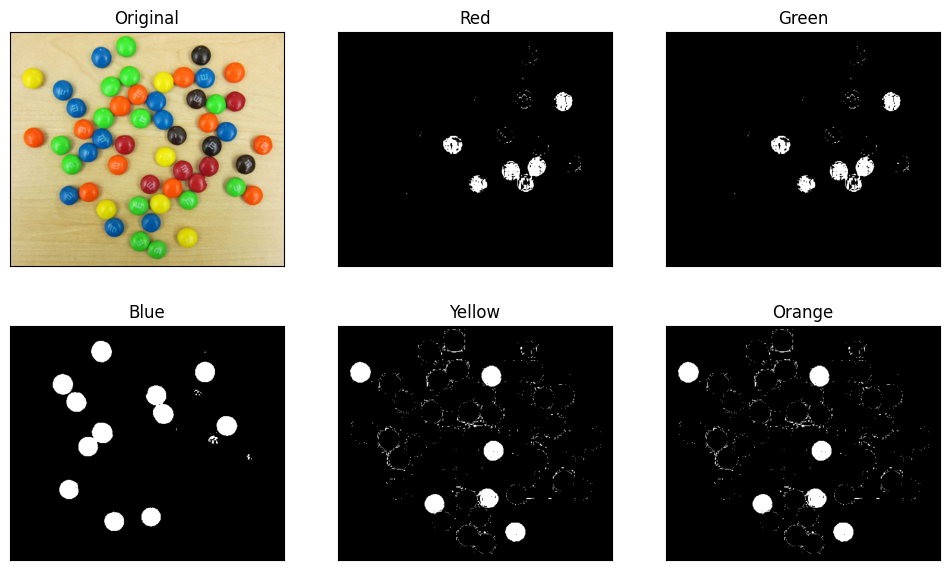

In [58]:
from skimage.color import rgb2hsv
mm = io.imread("mm.jpg")
print(mm.shape)
width = mm.shape[1]
print(width)
height = mm.shape[0]
img_R = np.zeros((height,width))
print(img_R.shape)
img_G = np.zeros((height,width))
img_B = np.zeros((height,width))
img_Y = np.zeros((height,width))
img_O = np.zeros((height,width))

mm_hsv = rgb2hsv(mm)
img_R[np.logical_and(mm_hsv[:, :, 0]>0.93, mm_hsv[:, :, 0]<0.999999)] = 255
img_G[np.logical_and(mm_hsv[:, :, 0]>0.1, mm_hsv[:, :, 0]<0.37)] = 255
img_B[np.logical_and(mm_hsv[:, :, 0]>0.5, mm_hsv[:, :, 0]<0.6)] = 255
img_Y[np.logical_and(mm_hsv[:, :, 0]>0.15, mm_hsv[:, :, 0]<0.17)] = 255
img_O[np.logical_and(mm_hsv[:, :, 0]>0.03, mm_hsv[:, :, 0]<0.08)] = 255
# 0為[hsv]之中的hue
plt.figure(figsize=(12,7))
plt.subplot(2, 3, 1)
plt.imshow(mm)
plt.title(label="Original")

plt.subplot(2, 3, 2)
plt.imshow(img_R, cmap='gray')
plt.title(label="Red")

plt.subplot(2, 3, 3)
plt.imshow(img_R, cmap='gray')
plt.title(label="Green")

plt.subplot(2, 3, 4)
plt.imshow(img_B, cmap='gray')
plt.title(label="Blue")

plt.subplot(2, 3, 5)
plt.imshow(img_Y, cmap='gray')
plt.title(label="Yellow")

plt.subplot(2, 3, 6)
plt.imshow(img_Y, cmap='gray')
plt.title(label="Orange")

plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
plt.show()

# Spatial Filtering 
## **<span style='color:#EA7500	'>Salt-and-Pepper Noise</span>**

<class 'numpy.ndarray'>
(246, 300)


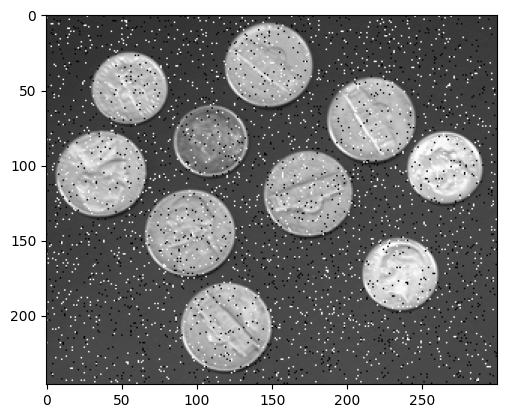

In [59]:
coins_snp = io.imread('coins_snp.png')
print(type(coins_snp))
print(coins_snp.shape)
plt.imshow(coins_snp, cmap='gray')
plt.show()

## **<span style='color:#EA7500	'>Filters for Neighborhood Operations</span>**

[[1 1 1]
 [1 1 1]
 [1 1 1]]


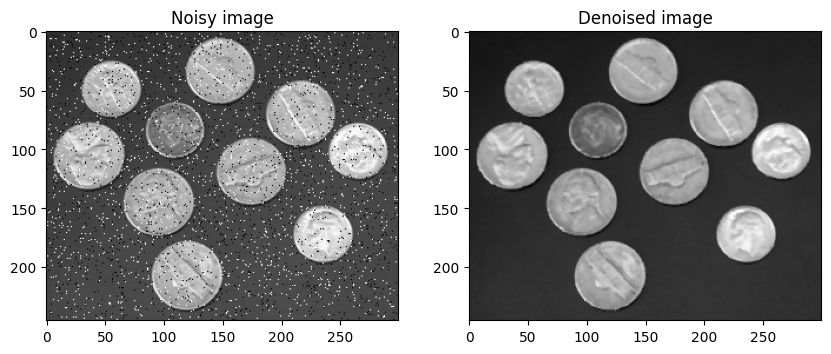

In [62]:
from skimage.filters.rank import median, minimum, maximum, mean
from skimage.morphology import square

neighborhood = square(width=3)
print(neighborhood)
coins_snp_denoised = median(coins_snp, neighborhood)
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.title('Noisy image')
plt.imshow(coins_snp, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Denoised image')
plt.imshow(coins_snp_denoised, cmap='gray')
plt.show()


## **<span style='color:#EDA0A9	'>Exercise 3 (5 mins)</span>**
Write a program to denoise the image ‘coins_gaussian.png’ <br>
Try different operations and neighborhood size

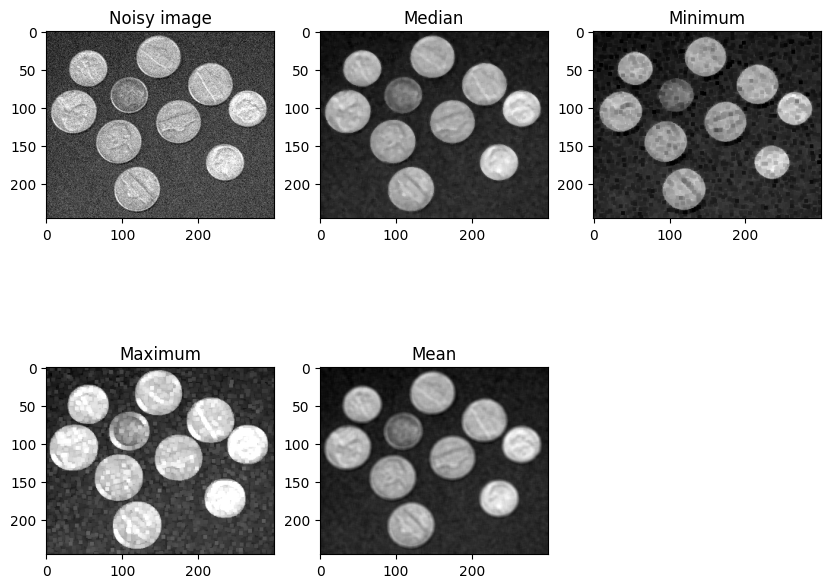

In [63]:
from skimage.morphology import square
from skimage.filters.rank import median, minimum, maximum, mean

coins_gaussian = io.imread('coins_gaussian.png')

neighborhood = square(width=5)
median_denoised = median(coins_gaussian, neighborhood)
minimum_denoised = minimum(coins_gaussian, neighborhood)
maximum_denoised = maximum(coins_gaussian, neighborhood)
mean_denoised = mean(coins_gaussian, neighborhood)

plt.figure(figsize=(10, 8))

plt.subplot(2, 3, 1)
plt.title('Noisy image')
plt.imshow(coins_gaussian, cmap='gray')
plt.subplot(2, 3, 2)
plt.title('Median')
plt.imshow(median_denoised, cmap='gray')
plt.subplot(2, 3, 3)
plt.title('Minimum')
plt.imshow(minimum_denoised, cmap='gray')
plt.subplot(2, 3, 4)
plt.title('Maximum')
plt.imshow(maximum_denoised, cmap='gray')
plt.subplot(2, 3, 5)
plt.title('Mean')
plt.imshow(mean_denoised, cmap='gray')
plt.show()


## **<span style='color:#EA7500	'>Mean Filter as Convolution </span>**

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


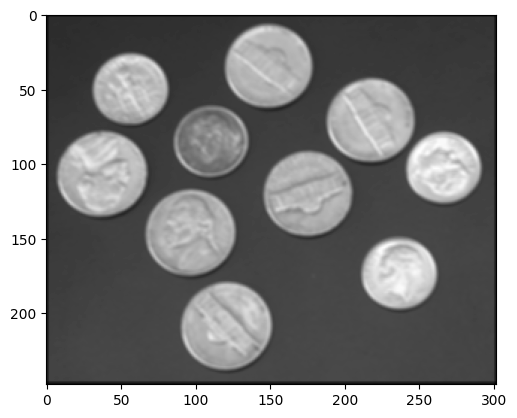

In [65]:
from scipy.signal import convolve2d
coins = io.imread('coins.png', as_gray=True)
filter2d = np.ones((3,3))/9
print(filter2d)
coins_smoothed = convolve2d(coins, filter2d)
plt.imshow(coins_smoothed)

## **<span style='color:#EDA0A9	'>Exercise 4 (5 mins)</span>**
What do images look like after convolving them with the two filters?

[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
[[1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


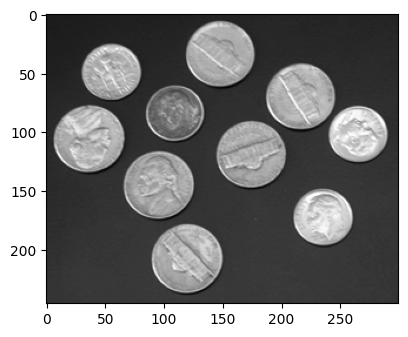

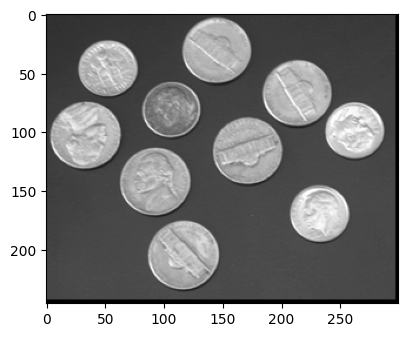

In [68]:
from scipy.signal import convolve2d
from skimage import morphology, img_as_float
coins = img_as_float(io.imread('coins.png', as_gray=True))

red_filter = np.zeros((3,3))
red_filter[1][1] = 1
print(red_filter)
blue_filter = np.zeros((7,7))
blue_filter[0][0] = 1
print(blue_filter)

coins_red = convolve2d(coins, red_filter, mode='same') 
coins_leftfilt = convolve2d(coins, blue_filter, mode='same')
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(coins_red, cmap='gray')
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 2)
plt.imshow(coins_leftfilt, cmap='gray')
plt.show()


## **<span style='color:#EA7500	'>Smoothing vs. Sharping</span>**

In [ ]:
# origin 做mean =smoothed

<class 'numpy.ndarray'>
(246, 300)


C:\Users\123\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3526: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


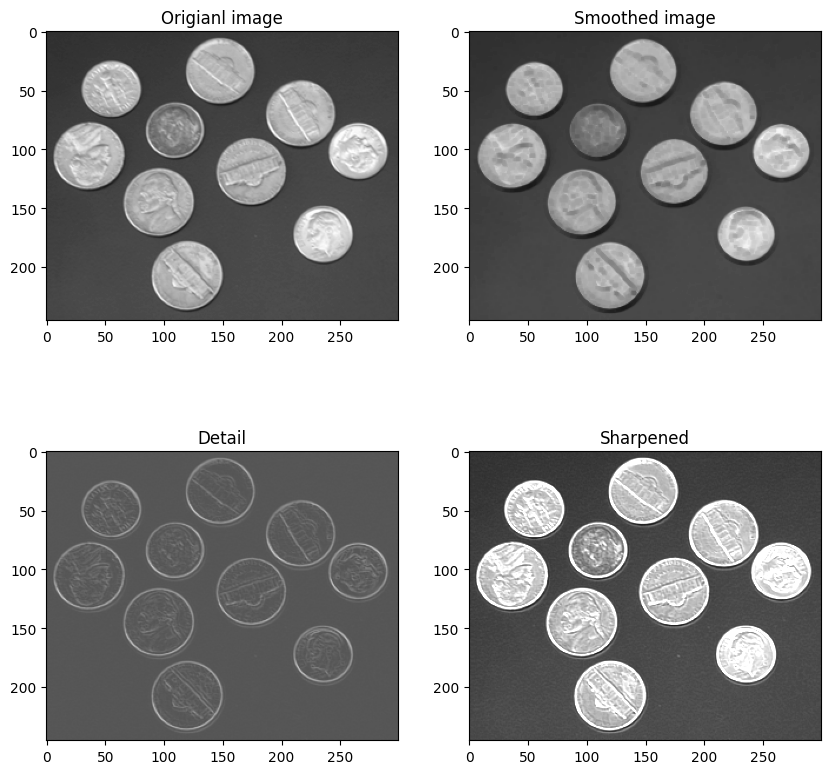

In [73]:
coins = img_as_float(io.imread('coins.png', as_gray=True))
print(type(coin))
print(coins.shape)
neighborhood = square(width=3)
coins_smoothed = img_as_float(minimum(coins, neighborhood))

detail = coins-coins_smoothed
coins_sharpend = coins + detail*2

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(coins, cmap='gray', vmin=0, vmax=1)
plt.title('Origianl image')
plt.subplot(2, 2, 2)
plt.imshow(coins_smoothed, cmap='gray', vmin=0, vmax=1)
plt.title('Smoothed image')
plt.subplot(2, 2, 3)
plt.imshow(detail, cmap='gray', vmin=-0.5, vmax=1)
plt.title('Detail')
plt.subplot(2, 2, 4)
plt.imshow(coins_sharpend, cmap='gray', vmin=0, vmax=1)
plt.title('Sharpened')
plt.show()


## **<span style='color:#EDA0A9	'>Exercise 5 (10 mins)</span>**
Generate a filter that sharpens an image

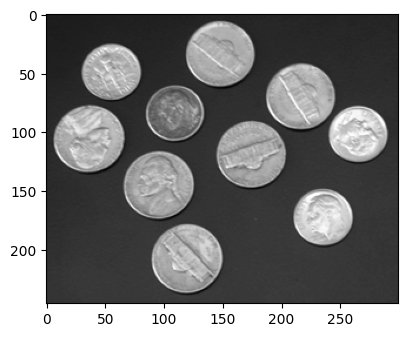

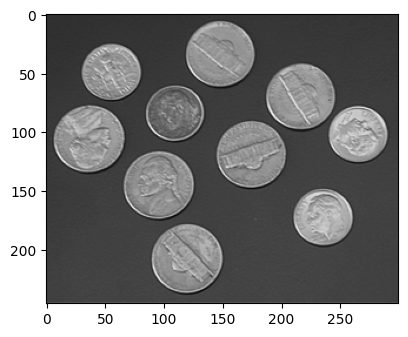

In [75]:
coins = io.imread('coins.png', as_gray=True)

red_filter = np.zeros((3,3))
red_filter[1][1] = 1

original_filter = red_filter

smoothed_filter = np.ones((3,3))/9
detail_filter = original_filter - smoothed_filter

sharpen_filter2d = original_filter*2 - smoothed_filter*1
coins_sharpen = convolve2d(coins, sharpen_filter2d, mode='same')
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(coins, cmap='gray')
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 2)
plt.imshow(coins_sharpen, cmap='gray')